### >> 데이터 업로드, 확인

In [25]:
import pandas as pd
df = pd.read_csv('DIABETES.csv')

In [26]:
df.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [27]:
# 데이터의 행과 열의 수 확인
df.shape

(442, 11)

In [28]:
# 데이터 형 확인
print(df.dtypes)

Y                int64
AGE              int64
GENDER           int64
BMI            float64
BP             float64
CHOLESTEROL      int64
LDL            float64
HDL            float64
TCH            float64
LTG            float64
GLUCOSE          int64
dtype: object


### >> 결손값의 확인

In [29]:
# 데이터의 행에 결손값이 포함되어 있는가? True: 결손값이 있음: False: 결손값 없음, 
print(df.isnull().any(axis=1))

0      False
1      False
2      False
3      False
4      False
       ...  
437    False
438    False
439    False
440    False
441    False
Length: 442, dtype: bool


In [30]:
# 데이터의 열에 결손값이 포함되어 있는가? rue: 결손값이 있음: False: 결손값 없음, 
print(df.isnull().any(axis=0))

Y              False
AGE            False
GENDER         False
BMI            False
BP             False
CHOLESTEROL    False
LDL            False
HDL            False
TCH            False
LTG            False
GLUCOSE        False
dtype: bool


In [31]:
# 데이터의 행별 결손값의 갯수
print(df.isnull().sum(axis=1))

0      0
1      0
2      0
3      0
4      0
      ..
437    0
438    0
439    0
440    0
441    0
Length: 442, dtype: int64


In [32]:
# 데이터의 열별 결손값의 갯수
print(df.isnull().sum(axis=0))

Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64


### >> 통계량 계산

In [35]:
# 데이터형이 수치인 통계량 계산
db_des = df.describe()
db_des

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,152.133484,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,77.093005,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,25.000000,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,87.000000,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,140.500000,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,211.500000,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,346.000000,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


### >> 데이터의 시각화 1

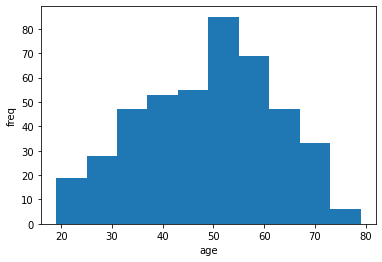

In [36]:
# Matplotlib의 탑재
import matplotlib.pyplot as plt
%matplotlib inline

# age의 히스토그램 작성
plt.hist(df['AGE'])

# x축(횡축)과 y축（종축)의 레이블 추가
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

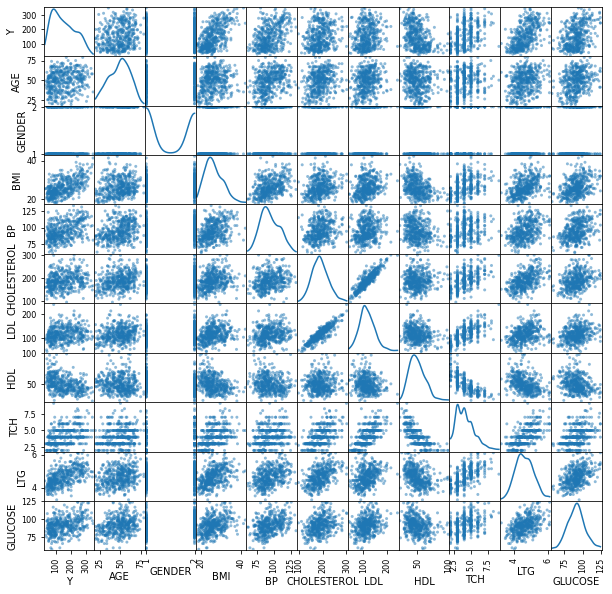

In [37]:
# 산점도 행렬
from pandas.plotting import scatter_matrix

scatter_matrix(df, 
               alpha=0.5, 
               figsize=(10, 10), 
               diagonal='kde')
plt.show()

##### * 문자열 항목의 원그래프

In [38]:
# GENDER값의 비율을 계산
print(df['GENDER'].value_counts(ascending=False, normalize=True))

1    0.531674
2    0.468326
Name: GENDER, dtype: float64


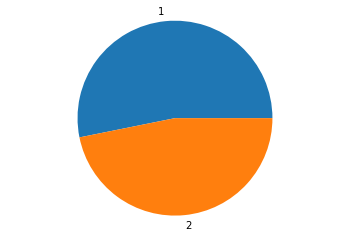

In [39]:
# GENDER값의 레이블
gd_label = df['GENDER'].value_counts(ascending=False, normalize=True).index
# GENDER의 값
gd_vals = df['GENDER'].value_counts(ascending=False, normalize=True).values

# GENDER의 원그래프 작성
plt.pie(gd_vals, labels=gd_label)
plt.axis('equal')
plt.show()

### >> 데이터의 시각화 2

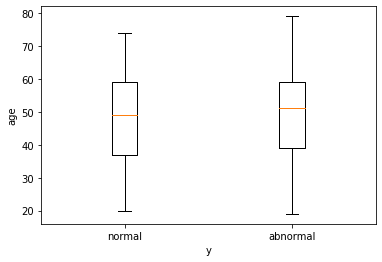

In [52]:
# y가 normal이나 abnormal일때의 age데이터를 추출
y_normal = df[(df['Y'] >=70) & (df['Y'] <= 130)]
y_abnormal = df[(df['Y'] < 70) | (df['Y'] > 130)]

# normal과 abnormal의 데이터 정리
y_age = [y_normal['AGE'], y_abnormal['AGE']]

# 박스수염 플롯의 작성
plt.boxplot(y_age)

plt.xlabel('y')
plt.ylabel('age')
ax = plt.gca()
# y축 （종축）의 레이블을 추가
plt.setp(ax, xticklabels = ['normal','abnormal'])
plt.show()

### >> 특이값(이상치)의 제외

In [53]:
# 데이터형이 수치인 통계량 관찰
db_des = df.describe()
db_des

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,152.133484,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,77.093005,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,25.000000,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,87.000000,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,140.500000,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,211.500000,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,346.000000,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


In [55]:
# age가 18세이상 100세미만이 아닌 행을 제외한 데이터 구축
df = df[df['AGE'] >= 18]
df = df[df['AGE'] < 100]

# 데이터 건수, 항목수를 확인
print(df.shape)

(442, 11)


In [56]:
# Y 값 통합 및 새로운 특성을 생성
# loc를 사용하여 70~130을 0으로 치환하고 Y2에 저장함.
df.loc[((df['Y'] >= 70) & (df['Y'] <= 130)), 'Y2'] = '0'
df.loc[((df['Y'] < 70) | (df['Y'] > 130)), 'Y2'] = '1'

# 1행에서 5행까지 표시
df.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,Y2
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,1
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,0
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,1
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,1
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,1


In [60]:
print(df.dtypes)

Y                int64
AGE              int64
GENDER           int64
BMI            float64
BP             float64
CHOLESTEROL      int64
LDL            float64
HDL            float64
TCH            float64
LTG            float64
GLUCOSE          int64
Y2              object
dtype: object


In [61]:
# Y2 데이터타입을 수치형으로 변환
df = df.replace('1', 1)
df = df.replace('0', 0)

print(df.dtypes)

Y                int64
AGE              int64
GENDER           int64
BMI            float64
BP             float64
CHOLESTEROL      int64
LDL            float64
HDL            float64
TCH            float64
LTG            float64
GLUCOSE          int64
Y2               int64
dtype: object


### >> 분석 데이터 세트 작성

In [63]:
# 주어진 데이터 세트에서 수치항목을 추출함
tmp1 = df[['Y2', 'AGE', 'GENDER', 'BMI', 'CHOLESTEROL',
                'LDL', 'HDL', 'TCH', 'LTG', 'GLUCOSE']]

# 1행에서 5행까지 표시
tmp1.head()

,Y2,AGE,GENDER,BMI,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,1,59,2,32.1,157,93.2,38.0,4.0,4.8598,87
1,0,48,1,21.6,183,103.2,70.0,3.0,3.8918,69
2,1,72,2,30.5,156,93.6,41.0,4.0,4.6728,85
3,1,24,1,25.3,198,131.4,40.0,5.0,4.8903,89
4,1,50,1,23.0,192,125.4,52.0,4.0,4.2905,80


### >> 데이터 정규화

In [65]:
# 범위변환을 수행하기 위해 MinMaxScaler를 탑재
from sklearn.preprocessing import MinMaxScaler
df = tmp1

# 데이터 세트에서 타깃(목적)변수를 제외
df = df.drop('Y2', axis=1)

# 범위변환의 인스턴스를 생성
mc = MinMaxScaler()
mc.fit(df)

# df의 각항목을 정규화
df_mc = pd.DataFrame(mc.transform(df), columns=df.columns)
df_mc.head(10)

,AGE,GENDER,BMI,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,0.666667,1.0,0.582645,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394
1,0.483333,0.0,0.148760,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667
2,0.883333,1.0,0.516529,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091
3,0.083333,0.0,0.301653,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697
4,0.516667,0.0,0.206612,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333
5,0.066667,0.0,0.190083,0.205882,0.115538,0.506494,0.000000,0.327003,0.151515
6,0.283333,1.0,0.165289,0.308824,0.288845,0.363636,0.141044,0.243287,0.363636
7,0.783333,1.0,0.338843,0.774510,0.714143,0.441558,0.359661,0.347643,0.515152
8,0.683333,1.0,0.582645,0.401961,0.387450,0.259740,0.282087,0.427955,0.545455
9,0.166667,0.0,0.495868,0.406863,0.257968,0.272727,0.282087,0.746393,0.454545


In [66]:
# Z변환을 수행하기 위해 StandardScaler를 탑재
from sklearn.preprocessing import StandardScaler

# Z변환 인스턴스 생성
sc = StandardScaler()
sc.fit(df)

# bank_df의 각항목을 정규화
df_sc = pd.DataFrame(sc.transform(df), columns=df.columns)
df_sc.head()

,AGE,GENDER,BMI,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,0.800500,1.065488,1.297088,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


In [67]:
# 각 항목의 평균 확인
print(df_sc.mean())

AGE            8.037814e-18
GENDER         1.607563e-16
BMI            1.004727e-16
CHOLESTEROL   -2.893613e-16
LDL           -1.245861e-16
HDL           -1.326239e-16
TCH           -1.446806e-16
LTG            2.250588e-16
GLUCOSE        2.371155e-16
dtype: float64


In [68]:
# 표준편차 확인
print(df_sc.std())

AGE            1.001133
GENDER         1.001133
BMI            1.001133
CHOLESTEROL    1.001133
LDL            1.001133
HDL            1.001133
TCH            1.001133
LTG            1.001133
GLUCOSE        1.001133
dtype: float64


### >> 그룹화

 * 계층적 클러스터링을 이용한 그룹 분할

In [69]:
# Linkage, Dendrogram의 탑재
from scipy.cluster.hierarchy import linkage, dendrogram

# Matplotlib의 탑재
import matplotlib.pyplot as plt
%matplotlib inline

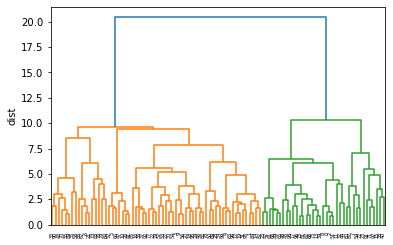

In [70]:
# linkage를 사용해 계층적 클러스터링의 실행
# 계산시간 관계상 환자 100명에 대한 데이터에 대해서만 실행함 
hcls = linkage(df_sc[:100], metric='euclidean', method='ward')
dendrogram(hcls)

# 덴드로그램의 작성
plt.ylabel('dist')
plt.show()

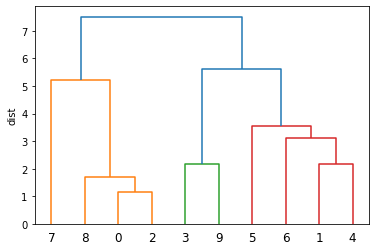

In [71]:
# linkage를 사용해 계층적 클러스터링의 실행
# 환자 10명에 대한 데이터에 대해서만 실행함 
hcls = linkage(df_sc[:10], metric='euclidean', method='ward')
dendrogram(hcls)

# 덴드로그램의 작성
plt.ylabel('dist')
plt.show()

In [77]:
# KMeans의 탑재
from sklearn.cluster import KMeans

# 환자를 5개그룹으로 분할
kcls = KMeans(n_clusters=5)
cst_group = kcls.fit_predict(df_sc)

# 환자별 클러스터ID를 확인
print(cst_group)

[4 0 4 1 1 3 3 0 4 4 3 4 0 4 0 2 4 4 1 1 3 3 1 2 1 4 3 3 3 0 1 0 2 0 3 0 4
 3 2 4 4 3 3 0 4 0 3 3 0 4 3 4 1 1 1 0 4 3 0 0 3 4 0 1 0 4 4 0 0 3 0 4 0 4
 0 0 3 3 3 1 0 4 0 3 3 4 3 0 0 0 0 0 0 0 1 3 4 2 0 1 0 0 1 4 3 0 3 4 4 4 0
 0 1 2 2 2 4 2 4 0 1 4 2 2 3 4 3 0 1 2 2 3 4 3 1 2 3 4 2 4 4 2 4 1 4 3 4 4
 0 4 4 0 2 0 4 2 3 4 1 4 1 2 3 4 0 3 3 2 2 2 0 3 2 3 3 0 4 2 0 1 4 0 4 4 4
 4 2 3 0 1 4 3 0 2 3 4 1 4 3 0 0 0 0 4 4 4 4 4 2 4 1 4 0 0 0 2 2 0 1 3 0 1
 0 3 3 4 3 0 1 0 2 1 4 0 4 4 0 0 4 0 2 0 3 0 0 3 0 1 2 2 2 2 4 0 2 0 4 0 4
 1 0 0 2 3 4 0 0 0 2 0 0 4 3 4 4 4 0 0 4 0 0 0 0 3 3 4 0 0 0 2 2 0 0 4 0 0
 0 3 3 0 4 0 4 0 4 4 0 4 3 4 4 0 1 4 4 0 2 0 0 0 2 2 2 2 2 2 4 4 4 0 4 3 2
 4 3 0 2 4 1 0 1 4 4 1 1 4 2 0 0 3 2 3 0 0 2 0 0 4 3 4 4 0 4 4 4 0 2 2 2 4
 0 4 0 3 3 4 2 4 4 3 3 3 2 0 0 0 0 3 4 0 2 3 0 3 2 1 3 4 0 4 0 0 4 4 3 4 3
 4 0 2 4 3 2 1 2 4 4 4 0 3 4 4 2 4 4 3 4 0 2 1 1 0 2 0 0 1 0 4 4 0 4 0]


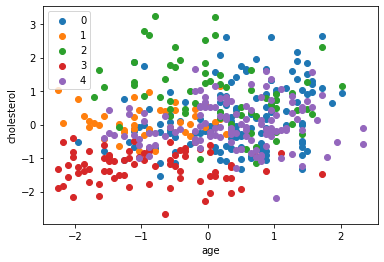

In [78]:
# 환자의 클러스터 ID마다 색을 부여하여 산포도를 작성함
for i in range(5):
    tmp = df_sc[cst_group == i]
    plt.scatter(tmp['AGE'], tmp['CHOLESTEROL'], label=i)

plt.legend()
plt.xlabel('age')
plt.ylabel('cholesterol')
plt.show()

In [79]:
# 데이터 세트에 클러스터 ID를 추가
df_sc['group'] = cst_group

df_sc.head()

,AGE,GENDER,BMI,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,group
0,0.800500,1.065488,1.297088,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,4
1,-0.039567,-0.938537,-1.082180,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,0
2,1.793307,1.065488,0.934533,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,4
3,-1.872441,-0.938537,-0.243771,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,1
4,0.113172,-0.938537,-0.764944,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,1


In [80]:
# 그룹별 데이터 건수 확인
print(df_sc['group'].value_counts())

0    133
4    126
3     76
2     65
1     42
Name: group, dtype: int64


In [81]:
# 클러스터0의 통계량 확인
df_sc[df_sc['group']==0].describe()

,AGE,GENDER,BMI,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,group
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.0
mean,0.380754,-0.049533,-0.468324,0.224537,-0.013169,0.918427,-0.574578,-0.274366,-0.084859,0.0
std,0.831217,0.999384,0.629458,0.946096,0.936771,0.944814,0.629990,0.898232,0.826597,0.0
min,-1.948811,-0.938537,-1.897929,-1.537229,-2.042195,-0.680245,-1.606102,-2.651040,-2.025562,0.0
25%,-0.039567,-0.938537,-0.923562,-0.524757,-0.554308,0.248580,-0.830301,-0.836933,-0.632237,0.0
50%,0.418651,-0.938537,-0.538347,-0.004058,-0.192212,0.790394,-0.830301,-0.403624,0.064426,0.0
75%,0.953240,1.065488,-0.062494,0.921630,0.446394,1.409610,-0.054499,0.311593,0.412757,0.0
max,2.022416,1.065488,1.138471,2.657295,2.632139,3.809072,0.760093,2.783042,2.067330,0.0
